In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('2019FY_airport_only.csv')
data.drop(["tripID", "pickup_datetime", "dropoff_datetime", "PULocationID", "DOLocationID"], 1).describe()

/Users/gir/.pyenv/versions/3.7.4/envs/test-project/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,10,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trip_dur,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tip_percent,ehail_fee
count,0.0,4.899350e+06,4.899770e+06,4.899350e+06,4.899350e+06,4.899770e+06,4.899770e+06,4.899770e+06,4.899770e+06,4.899770e+06,4.899770e+06,4.899770e+06,4.655164e+06,4.899770e+06,0.0
mean,NaN,1.584639e+00,1.245452e+01,1.378844e+00,1.352405e+00,3.894551e+01,8.631193e-01,4.904310e-01,5.765515e+00,3.222579e+00,2.978758e-01,5.037271e+01,1.238111e+00,6.181923e-04,NaN
std,NaN,1.216108e+00,6.242316e+00,7.138130e-01,5.192956e-01,3.707088e+02,1.400341e+00,7.833696e-02,5.519632e+00,3.471985e+00,3.406120e-02,3.709718e+02,1.251224e+00,2.485579e-02,NaN
min,NaN,0.000000e+00,-1.400000e+01,1.000000e+00,1.000000e+00,-5.300000e+02,-5.500000e+00,-5.000000e-01,-7.500000e+01,-3.724000e+01,-3.000000e-01,-5.308000e+02,-2.500000e+00,0.000000e+00,NaN
25%,NaN,1.000000e+00,8.340000e+00,1.000000e+00,1.000000e+00,2.750000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,3.696000e+01,0.000000e+00,0.000000e+00,NaN
50%,NaN,1.000000e+00,1.142000e+01,1.000000e+00,1.000000e+00,3.800000e+01,5.000000e-01,5.000000e-01,6.000000e+00,5.760000e+00,3.000000e-01,4.992000e+01,0.000000e+00,0.000000e+00,NaN
75%,NaN,2.000000e+00,1.767000e+01,2.000000e+00,2.000000e+00,5.200000e+01,1.000000e+00,5.000000e-01,1.000000e+01,6.120000e+00,3.000000e-01,6.556000e+01,2.500000e+00,0.000000e+00,NaN
max,NaN,9.000000e+00,5.430900e+02,9.000000e+00,5.000000e+00,6.711231e+05,8.756000e+01,3.300000e+00,4.950000e+02,7.657600e+02,3.000000e-01,6.711249e+05,2.750000e+00,1.000000e+00,NaN


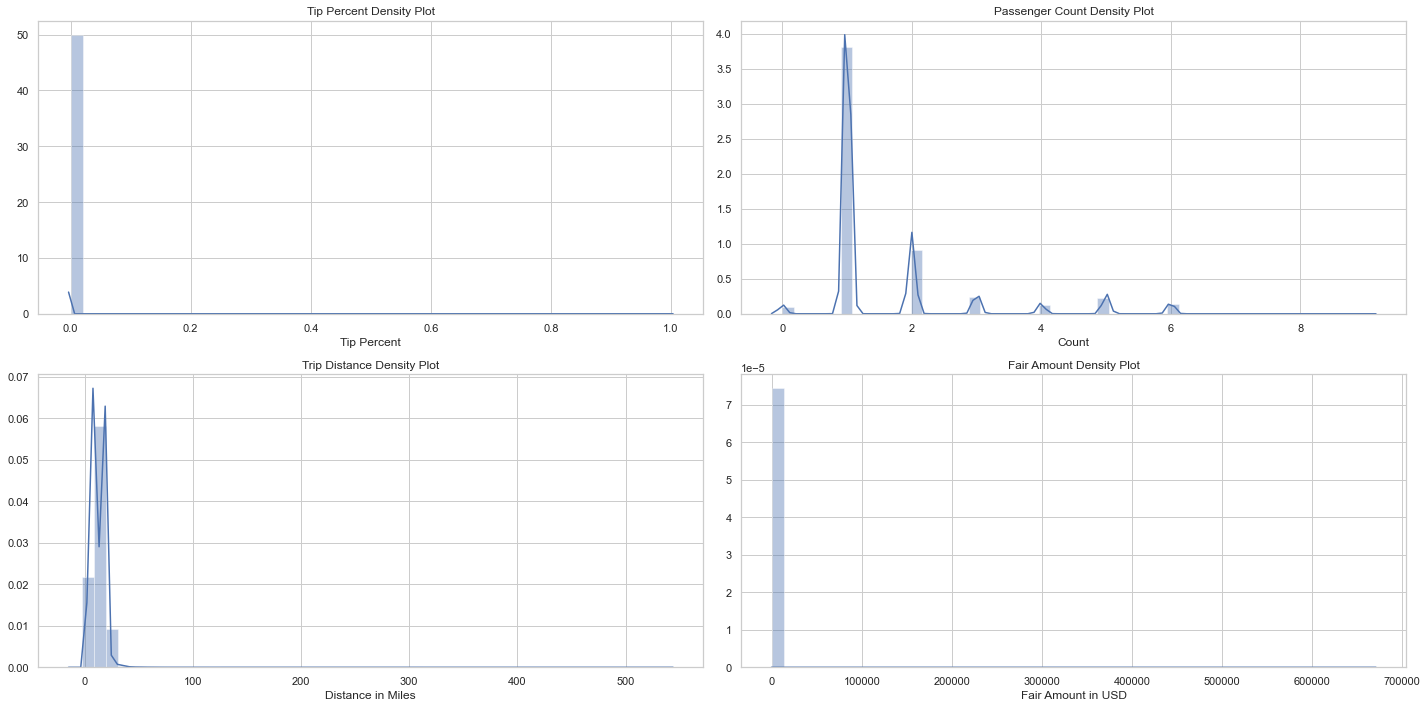

In [5]:
# distplot shows density out of population
sns.set(style="whitegrid")
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.set_color_codes("pastel")
sns.distplot(data.tip_percent, ax = ax1)
sns.distplot(data.passenger_count, ax = ax2)
sns.distplot(data.trip_distance, ax = ax3)
sns.distplot(data.fare_amount, ax = ax4)

# would not work with Trip Duration
ax1.title.set_text("Tip Percent Density Plot")
ax2.title.set_text("Passenger Count Density Plot")
ax3.title.set_text("Trip Distance Density Plot")
ax4.title.set_text("Fair Amount Density Plot")

ax1.set(ylabel="", xlabel="Tip Percent")
ax2.set(ylabel="", xlabel="Count")
ax3.set(ylabel="", xlabel="Distance in Miles")
ax4.set(ylabel="", xlabel="Fair Amount in USD")

plt.tight_layout()

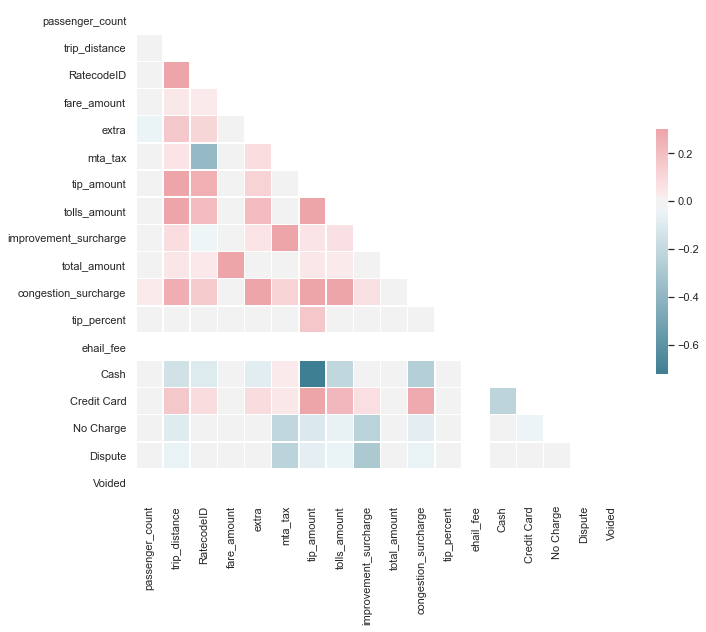

In [9]:
import numpy as np
# 1=Credit card 2=Cash 3=No charge 4=Dispute 5=Unknown 6=Voided trip
di = {1: "Credit Card", 2: "Cash", 3: "No charge", 4: "Dispute", 5: "Unknown", 6: "Voided"}

temp = (data
        .replace({"payment_type": di})
        .drop(['tripID', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_dur'], 1)
        
       )

temp['Cash'] = np.where(temp['payment_type'] == "Cash", 1, 0)
temp['Credit Card'] = np.where(temp['payment_type'] == "Credit Card", 1, 0)
temp['No Charge'] = np.where(temp['payment_type'] == "No charge", 1, 0)
temp['Dispute'] = np.where(temp['payment_type'] == "Dispute", 1, 0)
temp['Voided'] = np.where(temp['payment_type'] == "Voided", 1, 0)

corr = temp.drop(["payment_type"], 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
temp_timeseries = (data
        .replace({"payment_type": di})
        .drop(['tripID', 'PULocationID', 'DOLocationID'], 1)
       )

temp_timeseries.head()

,pickup_datetime,dropoff_datetime,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_dur,hvfhs_license_num,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tip_percent,ehail_fee
0,NaN,NaN,EWR,Newark Airport,EWR,EWR,Newark Airport,EWR,NaN,NaN,...,100.0,0.0,0.0,20.06,0.0,0.3,120.36,0.0,0.0,NaN
1,NaN,NaN,EWR,Newark Airport,EWR,EWR,Newark Airport,EWR,NaN,NaN,...,79.5,0.0,0.0,5.00,22.5,0.3,107.30,0.0,0.0,NaN
2,NaN,NaN,EWR,Newark Airport,EWR,EWR,Newark Airport,EWR,NaN,NaN,...,115.0,0.0,0.0,15.00,0.0,0.3,130.30,0.0,0.0,NaN
3,NaN,NaN,EWR,Newark Airport,EWR,EWR,Newark Airport,EWR,NaN,NaN,...,100.0,0.0,0.5,10.00,0.0,0.3,110.80,0.0,0.0,NaN
4,NaN,NaN,EWR,Newark Airport,EWR,EWR,Newark Airport,EWR,NaN,NaN,...,10.0,0.0,0.0,2.06,0.0,0.3,12.36,0.0,0.0,NaN


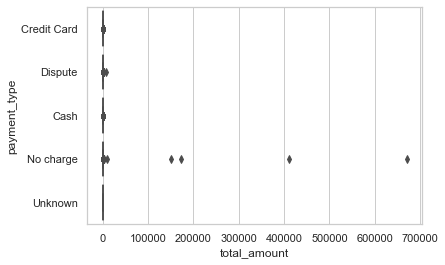

In [12]:
temp_boxplot = data.replace({"payment_type": di})
sns.boxplot( y=temp_boxplot["payment_type"], x=temp_boxplot["total_amount"] );
plt.show()

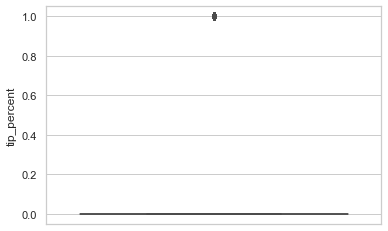

In [14]:
sns.boxplot(y=temp_boxplot["tip_percent"]);
plt.show()

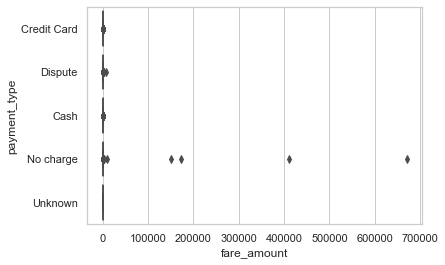

In [15]:
sns.boxplot(y=temp_boxplot["payment_type"], x=temp_boxplot["fare_amount"]);
plt.show()

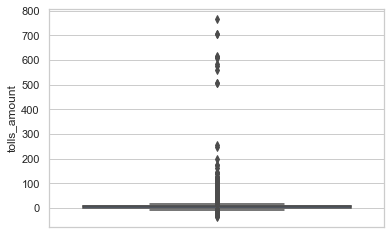

In [16]:
sns.boxplot(y=temp_boxplot["tolls_amount"]);
plt.show()